# AM1054 Continuous Assessment 2

In [1]:
# execute this cell before you start the assignment
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from ipywidgets import interact

sym.init_printing(use_latex="mathjax")
x, y, z, t = sym.symbols('x y z t')

Due Monday 23 November 2020, 12noon. No late assignments will be accepted. Strictly individual (no team) solutions are required. 

Upload your solution file `CA2.ipynb` to Canvas. 

Write `std_nr='11XXXXXXX'` (where 11XXXXXXX is your student number) into the next cell:

In [71]:
# YOUR CODE HERE
std_nr = '120309116'

In [72]:
assert(int(std_nr))

# 1. The Henon Sequence

Consider the Henon sequence 

\begin{equation}
((x_0,y_0), (x_1,y_1), (x_2,y_2),\ldots),
\end{equation}
which consists of pairs of numbers, and is iteratively defined as follows:

\begin{align}
x_0 &= 0\\
y_0 &= 0\\
x_{{n+1}}&=1-ax_{n}^{2}+y_{n}
\\y_{{n+1}}&=bx_{n}.
\end{align}
$a$ and $b$ are positive parameters.

a) Write a Python function `henon_sequence(N, a=1.4, b=0.3)` which returns a numpy array of shape `(N,2)` of the first $N$ pairs of the Henon sequence for the classical parameters $a=1.4$ and $b=0.3$. Calculate `henon_sequence(10)`. (2 marks)

In [73]:
# (N,2) is n rows with 2 columns.
def henon_sequence(N, a=1.4, b=0.3):
    x,y = 0, 0
    array1 = [[0,0]]
    for i in range(1,N):
        x,y = 1 - (a * (x**2)) + y, b * x
        array1.append([x,y])
    
    return np.array(array1)

    
henon_sequence(10)

array([[ 0.        ,  0.        ],
       [ 1.        ,  0.        ],
       [-0.4       ,  0.3       ],
       [ 1.076     , -0.12      ],
       [-0.7408864 ,  0.3228    ],
       [ 0.55432228, -0.22226592],
       [ 0.34755162,  0.16629668],
       [ 0.99718771,  0.10426548],
       [-0.28787117,  0.29915631],
       [ 1.18313858, -0.08636135]])

In [74]:
np.testing.assert_allclose(henon_sequence(2)[-1],(1.0, 0.0))
assert henon_sequence(10).shape == (10,2)

b) Plot the first 100000 pairs of the Henon sequence as red dots (use `markersize=0.1`) in an $x$-$y$ diagram. Do not use a loop. (1 marks)

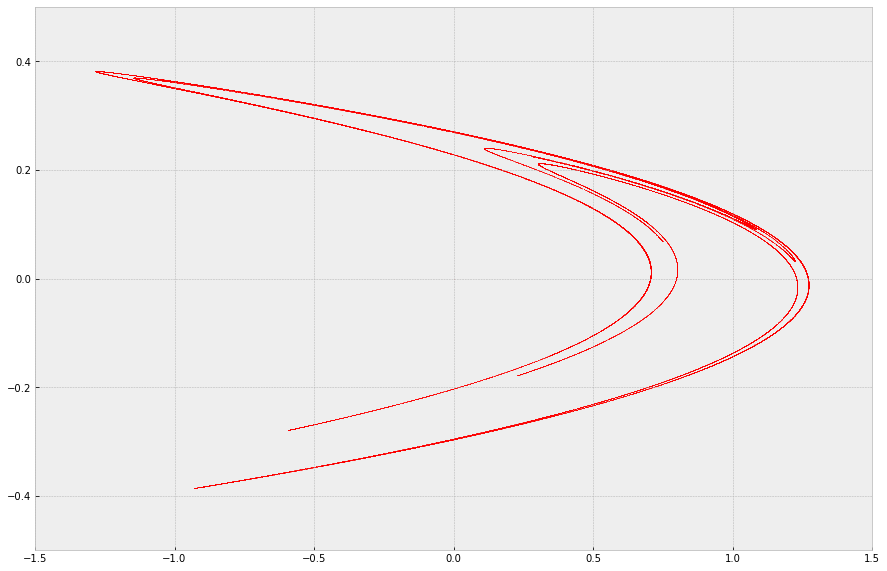

In [75]:
henon = henon_sequence(100000)

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [15, 10]
plt.xlim(-1.5,1.5)
plt.ylim(-0.5,0.5)
plt.scatter(henon[:,0],henon[:,1], color = 'red', marker = '.',s = 0.1)
plt.show()

c) Redo the last plot, and highlight the pair with the largest distance from the origin with a green square.  Assign this distance to the variable `maxdist`. (2 marks)

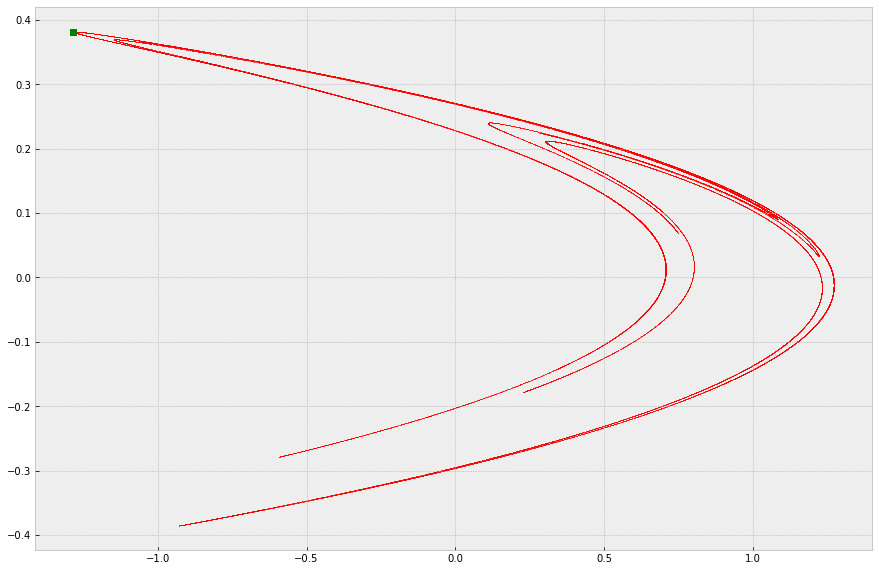

In [76]:
def henon_greensquare(a=1.4,b=0.3):
    N=100000
    x, y = 1, 0
    array1 = [[0,0]]
    
    for i in range(1,N):
        x,y = 1 - (a * (x**2)) + y, b * x
        array1.append([x,y])
        
    return np.array(array1)

hgs = henon_greensquare()

plt.scatter(hgs[:,0],hgs[:,1], color = 'red', marker = '.',s = .1)
    
maxhenon = np.sqrt(((hgs[:,0]**2))+(hgs[:,1])**2)
maxdist = max(maxhenon.tolist())
gs = maxhenon.tolist().index(maxdist)
plt.plot(hgs[gs,0], hgs[gs,1], 'gs')
plt.show()

In [77]:
# This works too, incase you prefer the code of this one to the last one.
'''def henon_greensquare(a=1.4,b=0.3):
    N=100000
    x, y = 1, 0
    array1 = [[0,0]]
    
    for i in range(1,N):
        x,y = 1 - (a * (x**2)) + y, b * x
        array1.append([x,y])
        
    nphenon = np.array(array1)

    plt.scatter(henon[:,0],henon[:,1], color = 'red', marker = '.',s = .1)
    
    maxhenon = np.sqrt(((nphenon[:,0]**2))+(nphenon[:,1])**2)
    maxdist = max(maxhenon.tolist())
    gs = maxhenon.tolist().index(maxdist)
    plt.plot(nphenon[gs,0], nphenon[gs,1], 'gs')
    return maxdist

maxdist = henon_greensquare()'''

"def henon_greensquare(a=1.4,b=0.3):\n    N=100000\n    x, y = 1, 0\n    array1 = [[0,0]]\n    \n    for i in range(1,N):\n        x,y = 1 - (a * (x**2)) + y, b * x\n        array1.append([x,y])\n        \n    nphenon = np.array(array1)\n\n    plt.scatter(henon[:,0],henon[:,1], color = 'red', marker = '.',s = .1)\n    \n    maxhenon = np.sqrt(((nphenon[:,0]**2))+(nphenon[:,1])**2)\n    maxdist = max(maxhenon.tolist())\n    gs = maxhenon.tolist().index(maxdist)\n    plt.plot(nphenon[gs,0], nphenon[gs,1], 'gs')\n    return maxdist\n\nmaxdist = henon_greensquare()"

In [78]:
assert maxdist>1.3

d) Redo the last plot and add two sliders, which allow you to change `a` in the interval from 0 to 1.4 in steps of 0.02 and `b` from 0 to 0.3 in steps of 0.01. (1 mark)

In [79]:

@interact(a=(0.0,1.4,0.02), b = (0.0,0.3,0.01))
def henon_slider(a=1.4,b=0.3):
    N=100000
    x, y = 1,0
    array1 = [[0,0],[1,0]]
    for i in range(2,N):
        x,y = 1 - (a * (x**2)) + y, b * x
        array1.append([x,y])
    
    hss = np.array(array1)
    
    plt.scatter(henon[:,0],henon[:,1], color = 'red', marker = '.',s = .1)
    henon_dist = np.sqrt(((hss[:,0]**2))+(hss[:,1])**2)
    maxhenon = max(henon_dist.tolist())
    gs = henon_dist.tolist().index(maxhenon)
    
    plt.plot(hss[gs,0], hss[gs,1], 'gs')
   
    

interactive(children=(FloatSlider(value=1.4, description='a', max=1.4, step=0.02), FloatSlider(value=0.3, desc…

# 2. Working with an array

Please run the following cell, which defines the variable `DAT`
which will be used in the subsequent parts of the question.

In [80]:
DAT = np.random.RandomState(0).random(100)

a) Use Python to find out, how many elements in `DAT` are larger than 0.6. Assign this number to the variable `count_1c`. (1 marks)

In [81]:
list = []
for i in DAT:
    if i > 0.6:
        list.append(i)

count_1c = len(list)
print(count_1c)

38


In [82]:
assert(count_1c>5)

b) How many elements in `DAT` are larger than their predecessor? Assign this number to the variable `count_1d`. (1 marks)

In [83]:
def noelttp(DAT):
    datlst=[]
    for index in range(len(DAT)-1):
        if DAT[index] < DAT[index + 1]:
            datlst.append(index)
    length = len(datlst)
    return length

count_1d = noelttp(DAT)
count_1d

50

In [84]:
assert(count_1d>5)

In [85]:

print(DAT[5:12:4])


[0.64589411 0.38344152]


c) Explain the meaning of the following Python expression in your own words:
```python
DAT[5:10:3]
```
(1 marks)

##### Answer :
It returns the value of the index at the index position stated at the start. Which, in this case, is index position five. After this, it then returns the value of every three index positions (not counting from zero). It does this until the end parameter, in this case, ten.

# 3. Presentation Skills

In the following links replace `xxx` with the last three digits of your student number.  

1. http://arxiv.org/abs/2010.14XXX
1. http://arxiv.org/abs/2010.13XXX
1. http://arxiv.org/abs/2010.12XXX
1. http://arxiv.org/abs/2010.11XXX
1. http://arxiv.org/abs/2010.10XXX
1. http://arxiv.org/abs/2010.09XXX
1. http://arxiv.org/abs/2010.08XXX
1. ....


a) Open the paper in the first link and look at the section headings of this paper. Reproduce the outline structure of this paper, by copying the section headings into the cell below with the appropriate heading level. Also include title, abstract, references, etc. as appropriate (Note: only copy section headings, not any part of the main text.) Add a direct link to the pdf of the paper. (1 marks)

[1st article with number 116](https://arxiv.org/pdf/2010.14116.pdf) <br>
**Im not certain if you wanted filler in between the paragaph titles so I did that without copying any part of the text.**

# Hydrodynamical model of QED cascade expansion in an extremely strong laser pulse
   A. S. Samsonov, $^a)$ I. Yu. Kostyukov, and E. N. Nerush

   *Institute of Applied Physics of the Russian Academy of Sciences, 46 Ulyanov St., Nizhny Novgorod 603950,*
<br>*Russia*
   <br>(Dated: October 28, 2020)
   
  
        
       Abstract Abstract Abstract Abstract Abstract Abstract Abstract Abstract Abstract Abstract Abstract
       Abstract Abstract Abstract Abstract Abstract Abstract Abstract Abstract Abstract Abstract Abstract
       Abstract Abstract Abstract Abstract Abstract Abstract Abstract Abstract Abstract Abstract
   
### I. INTRODUCTION
This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.   |     This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.

### II. QED CASCADE DEVELOPMENT MODEL DERIVATION



This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while. This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.
#### A. Model assumptions
This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.
#### B. Electromagnetic field configuration
  This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while. This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.
#### C. Coupled gamma-quanta distribution function
This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while. This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.
#### D. Pairs dynamics in the vacuum region
This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.
#### E. Pairs dynamics in the plasma region

This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.
### III. MODEL FORMULATION AND COMPARISON WITH QED-PIC SIMULATIONS
This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.   |     This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.
This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.   |     This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.
### IV. CONCLUSION
This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.   |     This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while. 
### ACKNOWLEDGEMENTS

This research was supported by Russian Science Foun- dation (Grant No. 20-12-00077), Foundation for the ad- vancement of theoretical physics and mathematics “BA- SIS” (Grant No. 19-1-5-10-1).

#### Appendix A: Particle acceleration in the plane wave

This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.

#### Appendix B: Effective dielectric permitivity of the $e^+ e^-$  <br>plasma

This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.

### REFERENCES
$^1$ P. Sturrock, "A model of pulsars," The Astrophysical Journal <br> **164**, 529 (1971)
<br>
$^2$ J. Daugherty and A. Harding, "Electromagnectic cascades in pul- <br>sars," The Astrophysical Journal **252**, 337-347 (1982)
<br>This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.This is long and continues on for a while.

b) Check through the papers in the links above and find mathematical formulas.  Reprodce them in the markdown cell below. Try to find examples which use reasonably complex formulas including one or more of `align`, `cases`, `array`. You should produce 600 characters of latex code. Precisely state, which formulas you reproduce from which papers and add direct links to the pdfs of the papers. (3 marks)

[both formula are next to eachother and labelled 1 and 2](https://arxiv.org/pdf/2010.14116.pdf)

Page 2 formula 1

\begin{align}
\frac{\partial f_e^\pm}{\partial t} + v_e^\pm \nabla f_e^\pm \pm & 
\left(
E + \left[
v_e^\pm \times B
\right]
\right)
\frac{\partial f_e^\pm}{\partial p}
= \\
= & \int f_\Upsilon
\left( p'
\right)
\omega_\text{pair}
\left(
p',p
\right)
dp' + \\
+ & \int f_e^\pm
\left(
p'
\right)
\omega_\text{rad} 
\left(
p',p
\right)
d p' - \\
- &\int f_e^\pm
\left(
p
\right)
\omega_\text{rad} 
\left(
p,p'
\right)
d p',
\end{align}

Page 2 formula 2

\begin{align}
\frac{\partial f_\Upsilon}{\partial t} + v_\Upsilon \nabla f_\Upsilon = &
\int f_e^\pm
\left(
p'
\right)
\omega_\text{rad}
\left(
p', p'- p
\right)d
p'- \\
+ & \int f_\Upsilon
\left(
p
\right)
\omega_\text{pair}
\left(
p,p'
\right)d
p',
\end{align}

c) Check through the papers in the links above and see, and find a nice figure with at least two subplots. Reprodce the axes of the graph, including axis labels, correct range of axes. Plot some fake data with at least 10 data points inside the graphs. The aim is to produce a graph, which at first sight looks roughly similar to the published plot.  The plot should at least require 20 lines of code, (without the definition of the data points).  Precisely state, which graph (page and figure number) you reproduce from which paper. Add direct links to the pdf of the papers. (3 marks)

[page 4 Fig.1.](https://arxiv.org/pdf/2010.13116.pdf)

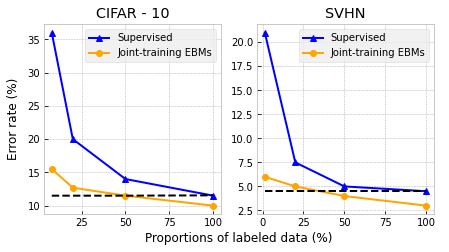

In [86]:
x1 = [8, 20, 50, 100]
y1 = [15.5,12.7,11.5,10]
x2 = [8 , 20 , 50 , 100 ]
y2 = [36, 20, 14, 11.5]
x3 = [8 , 20 , 50 , 100 ]
y3 = [11.5, 11.5,11.5, 11.55]

x21 = [1.37,20,50,100]
y21 = [6, 5, 4, 3]
x22 = [1.37,20,50,100]
y22 = [21, 7.5, 5, 4.5]
x23 = [1.37,20,50,100]
y23 = [4.5,4.5, 4.5, 4.5]

with plt.style.context('bmh'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3.5))
    ax1.set_title('CIFAR - 10')
    ax1.plot(x2, y2, color = 'blue', marker = '^', label = 'Supervised')
    ax1.plot(x1, y1, color = 'orange', marker = 'o', label = 'Joint-training EBMs')
    ax1.plot(x3, y3, color = 'black', linestyle = '--')
    ax1.set_facecolor('white')
    ax1.legend()

    ax2.set_title('SVHN')
    ax2.plot(x22, y22, color = 'blue', marker = '^', label = 'Supervised')
    ax2.plot(x21,y21, color = 'orange', marker = 'o', label = 'Joint-training EBMs')
    ax2.plot(x23, y23, color = 'black', linestyle = '--')
    ax2.set_facecolor('white')
    ax2.legend()

    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.tick_params(grid_visible = False)
    plt.xlabel('Proportions of labeled data (%)')
    plt.ylabel('Error rate (%)')
    
    plt.show()

# 4. Ornstein Uhlenbeck process

Consider the function
\begin{equation}
p_w(z,t)=\frac{1}{\sqrt{\pi \left(1-\exp\left[-2 t\right]\right)}}
\exp\left[-\frac{\left(z-\exp\left[-t\right]\right)^{2}}{1-
\exp\left[-2t\right]}\right]
\end{equation}

a) Define a python variable `p_w` which is a `sympy` expression for $p_w(z,t)$ with sympy symbols `z` and `t`. (1 mark)

In [87]:
p_w1 =( 1 / sym.sqrt(sym.pi * (1 - sym.exp(-2*t)) ))
p_w2 = sym.exp(-(z - sym.exp(-1 * t))**2 / (1 - sym.exp(-2 * t)))
p_w = p_w1 * p_w2
p_w

             2   
    ⎛     -t⎞    
   -⎝z - ℯ  ⎠    
   ────────────  
         -2⋅t    
    1 - ℯ        
  ℯ              
─────────────────
      ___________
     ╱      -2⋅t 
√π⋅╲╱  1 - ℯ     

In [88]:
np.testing.assert_allclose(float(p_w.subs({z:0, t:1}).n()), 0.518831632096486)

b) Show that $p_w(z,t)$ fulfills the partial differential equation 
\begin{equation}
\partial_{t}p_w(z,t)=\partial_{z}\left[zp_w(z,t)\right]+ \frac{1}{2} \partial_{z}^{2}p_w(z,t)
\end{equation} 

Do this by defining two Python variables `LHS` and `RHS` which contain the left hand side and right hand side of this equation. Do all differentiations using `sympy`, do not differentiate by hand! Then show that the difference LHS - RHS vanishes. (2 marks)


In [89]:
LHS = sym.Derivative(p_w,t).doit()
RHS = (sym.Derivative(z*p_w,z) + 0.5 * sym.Derivative(p_w,z,2)).doit()
sym.simplify(LHS - RHS)

0

In [90]:
assert(sym.simplify(LHS-RHS) == 0)

c) Plot $p_w(z,t)$ for the three values $t=0.1, 1, 10$ in a $p(z,t)$ versus $z$ diagram. 1 marks)

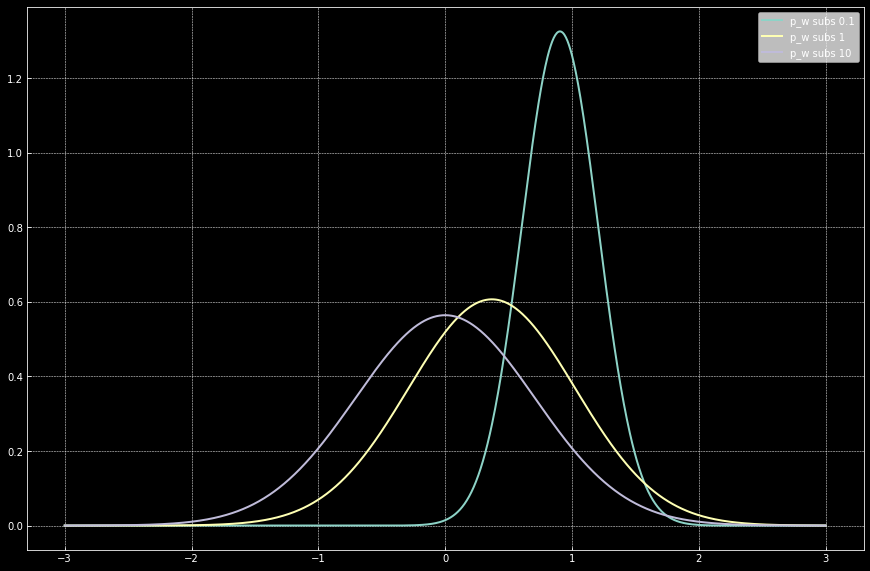

In [91]:
pw1 = p_w.subs(t,0.1)
pw2 = p_w.subs(t,1)
pw3 = p_w.subs(t,10)

npw1 = sym.lambdify(z, pw1)
npw2 = sym.lambdify(z, pw2)
npw3 = sym.lambdify(z, pw3)

pwz = np.linspace(-3,3,1000)

with plt.style.context('dark_background'):
    plt.plot(pwz, npw1(pwz), label='p_w subs 0.1')
    plt.plot(pwz, npw2(pwz), label='p_w subs 1')
    plt.plot(pwz, npw3(pwz), label='p_w subs 10')
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.style.use('bmh')
    plt.legend()
    plt.show()



## 5. Spherical Bessel functions

The spherical [Bessel functions](https://en.wikipedia.org/wiki/Bessel_function#Spherical_Bessel_functions:_jn.2C_yn) $j_n(r)$ (for $r>0$) can be defined through

\begin{equation}
j_{n-1}(r) = \left.\left[\frac{\partial^n}{\partial t^n} \frac{\cos \left(\sqrt{r^{2}-2rt}\right)}{r}\right]\right|_{t=0}
\end{equation}

a) Use this definition and sympy to calculate algebraic expressions for $j_0(r)$, $j_1(r)$, and $j_{10}(r)$ symbolically.  Assign these expressions to the Python variables `j0`, `j1` and `j10` respectively. 

Hint: Use `r = sym.symbols("r", positive=True)`.
(2 marks)

In [92]:
r = sym.symbols("r", positive=True)
j0 = (sym.diff(((sym.cos(sym.sqrt((r**2)-2*r*t)))/r),t,1)).subs(t,0)

j1 = (sym.diff(((sym.cos(sym.sqrt((r**2)-2*r*t)))/r),t,2)).subs(t,0)

j10 = (sym.diff(((sym.cos(sym.sqrt((r**2)-2*r*t)))/r),t,11)).subs(t,0)

In [93]:
assert(j0.limit(r,0)==1)
assert(j1.limit(r,0)==0)
assert(j10.limit(r,0)==0)

b) Plot $j_0(r)$, $j_1(r)$, and $j_{10}(r)$ for $r\in (0,20]$. Limit the y-axis to the interval $[-1,1]$ and add an appropriate legend. (1 marks)

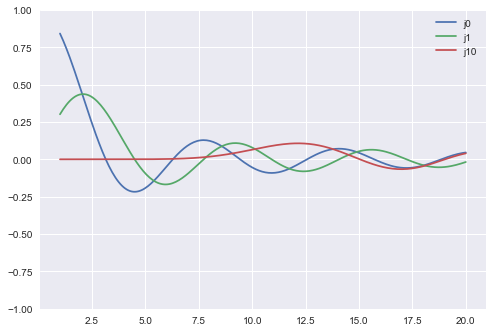

In [94]:
npj0 = sym.lambdify(r, j0)
npj1 = sym.lambdify(r, j1)
npj10 = sym.lambdify(r, j10)

npr = np.linspace(1,20,250)


with plt.style.context('seaborn'):
    plt.plot(npr, npj0(npr), label='j0')
    plt.plot(npr, npj1(npr), label='j1')
    plt.plot(npr, npj10(npr), label='j10')
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.ylim(-1,1)
    plt.style.use('seaborn')
    plt.legend()
    plt.show()

c) Show that $j_{10}(r)$ fulfills the equation
\begin{equation}
r^{2}{\frac {d^{2}j_{10}(r)}{dr^{2}}}+2r{\frac {dj_{10}(r)}{dr}}+[r^{2}-10(10+1)]j_{10}(r)=0.
\end{equation}

(2 marks)

In [95]:
expr = r**2 * (sym.diff(j10,r,r))
expr2 = 2*r*(sym.diff(j10,r))
expr3 =(((r**2)- 110)*j10)

lhs = expr + expr2 + expr3
(lhs).simplify()

0